In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class SVM:
    def __init__(self,c,lr,epochs):
        self.c = c
        self.lr = lr
        self.epochs = epochs

    def fit(self,x, y):
        self.w = np.zeros(x.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            for i, val in enumerate(x):
                # condition for checking the constraints
                # for label 1: y*(m*x +c) >= 1
                # for label -1: y*(m*x +c) <= -1
                # we combine both constraints into y*(m*x +c) >= 1
                # if positive label: 1*(positive value) >= 1  -> true positive
                # if negative label: -1*(negative value) >= 1  -> true negative if the pred is wrong condition swap
                condition = y[i] * (np.dot(x[i],self.w) + self.b) > 1

                # if condition is satisfy, we apply only lr.
                if condition:
                    dw = self.w
                    db = 0
                else:
                    # objective function for svm is svm = 1/2*|w|**2 * c(sum(max(0,1-(y*(w*x) + b))))
                    # 1/2 * |w|**2 is regularization for penality.
                    # max(0,1-y*(w*x)) is hinge loss for penalize the margin violation.
                    # if violated the w-yxc
                    dw = self.w - (y[i] * x[i] * self.c)
                    # gradient for bias is -cy
                    db = - self.c * y[i]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self,x):
        result = np.dot(x, self.w) + self.b
        return np.sign(result)

In [4]:
X = np.array([
    [2, 2],
    [3, 3],
    [2, 3],
    [-2, -2],
    [-3, -3],
    [-2, -3]
])
y = np.array([1, 1, 1, -1, -1, -1])

In [5]:
svm_model = SVM(lr=0.01,c=0.1,epochs=100)
svm_model.fit(x=X,y= y)

In [6]:
svm_model.predict(X)

array([ 1.,  1.,  1., -1., -1., -1.])

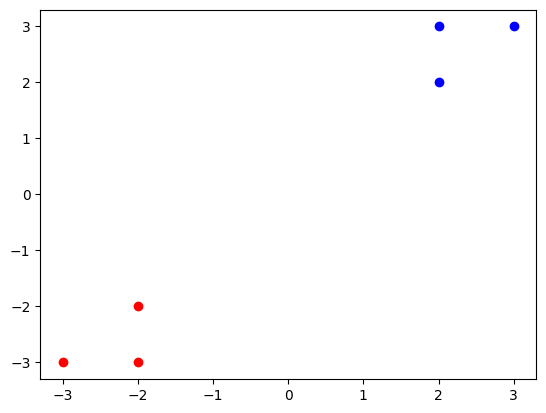

In [7]:
# Positive points
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Positive (+1)')
# Negative points
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='Negative (-1)')


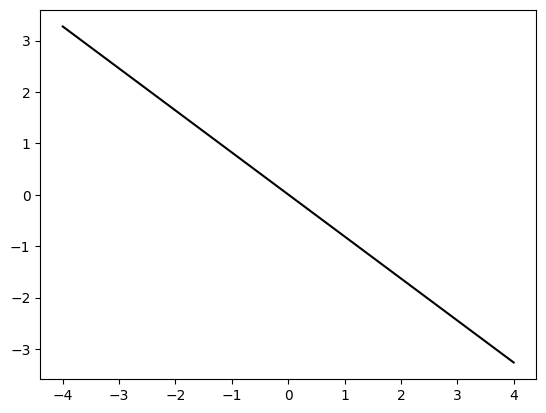

In [8]:
# x values for the line
x0 = np.linspace(-4, 4, 100)
# decision boundary
x1 = -(svm_model.w[0] * x0 + svm_model.b) / svm_model.w[1]
plt.plot(x0, x1, 'k-', label='Decision boundary')


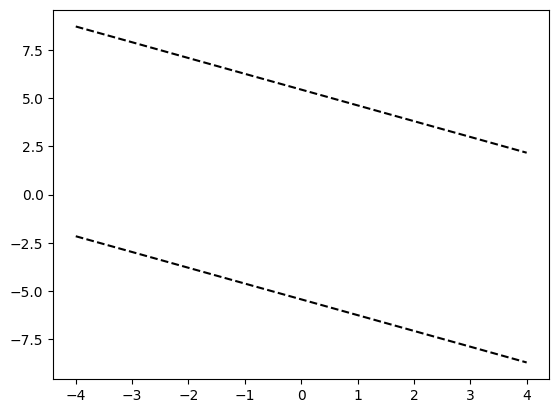

In [9]:
margin = 1 / np.linalg.norm(svm_model.w)
# upper margin
x1_upper = -(svm_model.w[0] * x0 + svm_model.b - 1) / svm_model.w[1]
# lower margin
x1_lower = -(svm_model.w[0] * x0 + svm_model.b + 1) / svm_model.w[1]

plt.plot(x0, x1_upper, 'k--', label='Margin +1')
plt.plot(x0, x1_lower, 'k--', label='Margin -1')


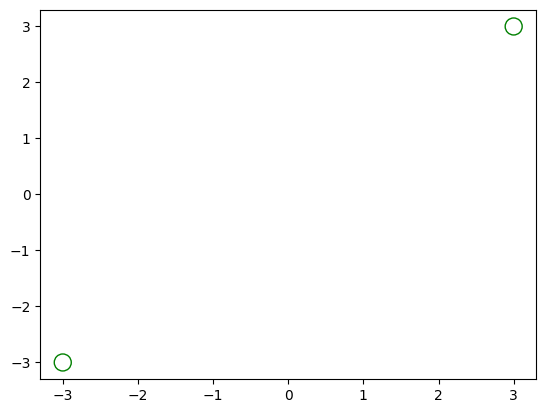

In [10]:
# Support vectors roughly satisfy y*(w·x+b) ≈ 1
for i in range(len(X)):
    if abs(y[i] * (np.dot(svm_model.w, X[i]) + svm_model.b) - 1) < 0.1:
        plt.scatter(X[i,0], X[i,1], s=150, facecolors='none', edgecolors='green')


In [ ]:
"""Interviewers LOVE this commentary:
“The margin is maximized by minimizing ||w||²”
“Hinge loss penalizes points inside the margin or misclassified”
“Only misclassified or margin-violating points affect gradients”
“C controls how strict the margin is”"""

In [11]:
"""Q: Why labels must be −1 and +1?
A: Hinge loss is defined as 1 − y(w·x + b); signs matter."""

'Q: Why labels must be −1 and +1?\nA: Hinge loss is defined as 1 − y(w·x + b); signs matter.'

In [12]:
"""Q: Why labels must be −1 and +1?
A: Hinge loss is defined as 1 − y(w·x + b); signs matter."""

'Q: Why labels must be −1 and +1?\nA: Hinge loss is defined as 1 − y(w·x + b); signs matter.'

In [13]:
"""Why no kernel?
A:
“This is the primal form; kernels require dual optimization or SMO."""

'Why no kernel?\nA:\n“This is the primal form; kernels require dual optimization or SMO.'

In [ ]:
# time complexity = O(n_samples×n_features×n_iters)

In [ ]:
"""How you should explain this in an interview (memorize this)
“For each training example, I check whether it satisfies the SVM margin constraint.
If it does, only the regularization term contributes to the gradient.
If it doesn’t, I add the hinge loss gradient, which pushes the hyperplane toward correct classification.
Then I update the weights using gradient descent.”"""

In [ ]:
"""Why update w even when condition is satisfied?
A: Because regularization always applies—it keeps the margin large.

Q Why hinge loss gradient disappears when condition is met?
A: Because hinge loss is max(0, 1 − margin).

Q: Why SGD instead of batch GD?
A: Simpler, faster convergence, common in interviews.

10. One-line summary (golden line)
“This loop enforces the margin constraint while maximizing margin using hinge loss and SGD.”"""